***Linear Regression***
--------------------------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd drive/MyDrive/Simplilearn/csv

/content/drive/MyDrive/Simplilearn/csv


In [4]:
df_adv=pd.read_csv('Advertising.csv',index_col=0)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
df_adv.columns=['Tv','Radio','Newspaper','Sales']

In [8]:
df_adv.head()

,Tv,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
df_adv.isnull().sum()

Tv           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

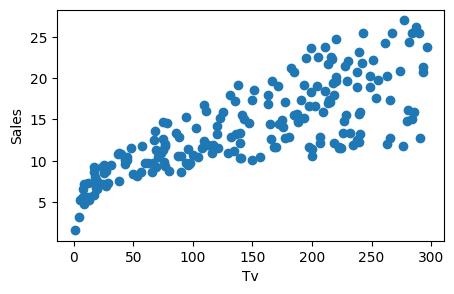

In [10]:
plt.figure(figsize=(5,3))
plt.scatter(df_adv['Tv'],df_adv['Sales'])
plt.xlabel('Tv')
plt.ylabel('Sales')
plt.show()

## splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X=df_adv['Tv']
y=df_adv['Sales']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [12]:
x_train.shape,y_train.shape

((140,), (140,))

In [13]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test.values.reshape(-1,1))
print(lin_reg.coef_,lin_reg.intercept_)

print("MAE : ",mean_absolute_error(y_test,y_pred))


[[0.0464078]] [7.23945983]
MAE :  2.2758809050205113


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test.values.reshape(-1,1))
print(lin_reg.coef_,lin_reg.intercept_)



[[0.0464078]] [7.23945983]


In [16]:
y_test_pred = lin_reg.predict(x_test.values.reshape(-1,1))
y_train_pred=lin_reg.predict(x_train)

mae_test = mean_absolute_error(y_test,y_test_pred)
mae_train = mean_absolute_error(y_train,y_train_pred)

In [17]:
from sklearn.metrics import r2_score
print(f'Performance on test data {mae_test},{r2_score(y_test,y_test_pred)}')
print(f'Performance on train data {mae_train},{r2_score(y_train,y_train_pred)}')


Performance on test data 2.2758809050205113,0.6714477229302764
Performance on train data 2.682626763698036,0.5736021199591975


####
* By observing the metrics we can say that the model is optimal , as the test and train error's are almost close by.

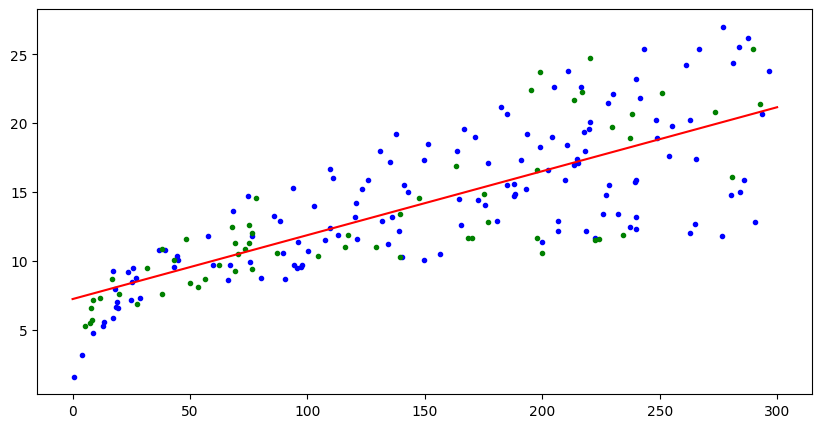

In [18]:
x= np.linspace(0,300,100)

m=lin_reg.coef_[0]
c= lin_reg.intercept_

y =(m*x)+c

plt.figure(figsize=(10,5))

## plotting the test, train data
plt.plot(x_train,y_train,'b.')
plt.plot(x_test,y_test,'g.')

## plot the y =mx+c
plt.plot(x,y,'r-')

plt.show()

#### Multiple Linear Regression


In [19]:
X = df_adv.drop(columns='Sales')
y= df_adv['Sales']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
print(lin_reg.coef_,lin_reg.intercept_)

print("MAE : ",mean_absolute_error(y_test,y_pred))

[0.04405928 0.1992875  0.00688245] 2.7089490925159065
MAE :  1.5116692224549086


In [21]:
y_test_pred = lin_reg.predict(x_test)
y_train_pred=lin_reg.predict(x_train)

mae_test = mean_absolute_error(y_test,y_test_pred)
mae_train = mean_absolute_error(y_train,y_train_pred)

In [22]:
from sklearn.metrics import r2_score
print(f'Performance on test data {mae_test},{r2_score(y_test,y_test_pred)}')
print(f'Performance on train data {mae_train},{r2_score(y_train,y_train_pred)}')


Performance on test data 1.5116692224549086,0.8609466508230368
Performance on train data 1.1581502948072526,0.9055159502227753


In [23]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(x_train,y_train)
y_pred = sgd_reg.predict(x_test)
print(sgd_reg.coef_,sgd_reg.intercept_)



[-1.21166165e+10 -1.88896576e+10 -9.73671757e+10] [2.28780097e+10]


#### Stochastic gradient Descent with l2 regularization

In [24]:
sgd_reg = SGDRegressor(max_iter=1000,penalty='l2',alpha=0.1,n_iter_no_change=30,random_state=42)
sgd_reg.fit(x_train,y_train)
y_pred = sgd_reg.predict(x_test)
print(sgd_reg.coef_,sgd_reg.intercept_)

[-9.32276344e+10  8.82448882e+10 -2.25891132e+10] [-1.02418702e+10]


In [25]:
y_test_pred = sgd_reg.predict(x_test)
y_train_pred=sgd_reg.predict(x_train)

mae_test = mean_absolute_error(y_test,y_test_pred)
mae_train = mean_absolute_error(y_train,y_train_pred)

In [26]:
from sklearn.metrics import r2_score
print(f'Performance on test data {mae_test},{r2_score(y_test,y_test_pred)}')
print(f'Performance on train data {mae_train},{r2_score(y_train,y_train_pred)}')


Performance on test data 10684140008785.465,-6.399057205425376e+24
Performance on train data 13295899914464.66,-8.971238532048859e+24


## Linear Regression with categorical variables
------------------------------------------------

* Models dont understand the string/text values we need to convert them into numerical values. Converting string /text to numerical values is called Encoding.

    * Label Encoding: will convert the text or string data to numerical values 0 ,1,2, ....n-1
      * n represents the number of unique values in the feature column.
        Eg : we have Male,Female then 0,1
            Red,yellow,bluee,green,   then 0,1,2,3

    *One-hot encoding : will give the binary values or array of binary values.
        * F,M --> [0,1] [1,0]

        * R,G,B,Y ---> [1 0 0 0] ,[0 1 0 0],[0 0 1 0],[0 0 0 1]

In [27]:
df_adv.head()

,Tv,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##### Let us convert the values into the categorical

In [28]:
df_adv['Tv'].mean()

147.0425

If the data is greater than mean then we will replace with 'Large' otherwise keep the value of TV

In [29]:
df_adv['Tv_cat'] = np.where(df_adv['Tv'] > df_adv['Tv'].mean(),'Large',df_adv['Tv'])

In [30]:
df_adv.head()

,Tv,Radio,Newspaper,Sales,Tv_cat
1,230.1,37.8,69.2,22.1,Large
2,44.5,39.3,45.1,10.4,44.5
3,17.2,45.9,69.3,9.3,17.2
4,151.5,41.3,58.5,18.5,Large
5,180.8,10.8,58.4,12.9,Large


## np.where(condition,replace value if cond is true,if ccondition is false)

In [31]:
df_adv['Tv_cat'] = np.where(df_adv['Tv'] <= df_adv['Tv'].mean(),'Small',df_adv['Tv_cat'])

In [32]:
X = df_adv.drop(columns='Sales')
y= df_adv['Sales']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
x_train

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();
le.fit(x_train['Tv_cat'])
x_train['Tv_cat']=le.transform(x_train['Tv_cat'])
x_test['Tv_cat']=le.transform(x_test['Tv_cat'])


In [36]:
x_train[:5]

,Tv,Radio,Newspaper,Tv_cat
170,284.3,10.6,6.4,0
98,184.9,21.0,22.0,0
32,112.9,17.4,38.6,1
13,23.8,35.1,65.9,1
36,290.7,4.1,8.5,0


In [37]:
le.classes_

array(['Large', 'Small'], dtype=object)

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.intercept_,lin_reg.coef_

(1.6089496005119237, array([0.0485698 , 0.19996707, 0.00639475, 0.87436539]))

In [39]:
y_test_pred = lin_reg.predict(x_test)
y_train_pred=lin_reg.predict(x_train)

mae_test = mean_absolute_error(y_test,y_test_pred)
mae_train = mean_absolute_error(y_train,y_train_pred)

In [40]:
from sklearn.metrics import r2_score
print(f'Performance on test data {mae_test},{r2_score(y_test,y_test_pred)}')
print(f'Performance on train data {mae_train},{r2_score(y_train,y_train_pred)}')


Performance on test data 1.4735008600049124,0.8690758991766457
Performance on train data 1.158024358068505,0.907293956064615


In [41]:
le.classes_

array(['Large', 'Small'], dtype=object)

## Effect of feature scaling:
* Solves the bias due to varying range of values in the feature columns and ensures all features are in same range.

* We need to give equal importance to all the columns , but there is a chance that some columns will have higher values , which might lead the model to go bias towards the larger values. Thats why we need feature scaling.

Consider for Eg : While predicting the price of a house consider we have area , age ,price as the columns .
* Here area will have larger values compared to age.
* The model will get biased towards the area column.

Min-Max Scaler : (x-xmin)/(xmax-xmin)

Standard Scaler : (x-mean)/sd

Standard scaler can be used when u see that the data has outliers and see that the data is normally distributed other wise we can go with the min-max scaler.

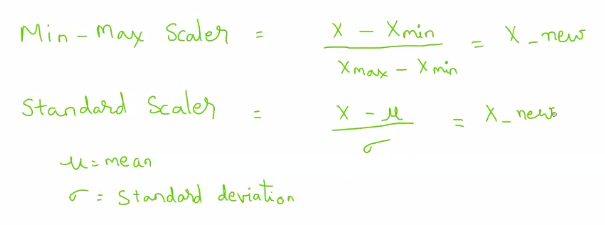


In [42]:
df_house=pd.read_csv('House_price_feature_Scaling.csv',index_col=0)

In [43]:
df_house.head()

,Bedrooms,SquareFootage,AgeOfHouse,HousePrice
0,4,2982,20,257100
1,5,1000,32,171800
2,3,2663,7,227450
3,5,1579,41,199850
4,5,1302,33,186800


In [44]:
X=df_house.drop(columns='HousePrice')
y=df_house['HousePrice']

In [45]:
X.head()

,Bedrooms,SquareFootage,AgeOfHouse
0,4,2982,20
1,5,1000,32
2,3,2663,7
3,5,1579,41
4,5,1302,33


#### Train

In [49]:
from sklearn.metrics import mean_squared_error

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
print("MSE :",mean_squared_error(y_test,y_pred))

MSE : 7.905640841040137e-22


#### Let us use StandardScaler

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [57]:
x_train_scaled[:5]

array([[ 0.02130072,  0.48188222, -0.02836263],
       [ 1.51235085, -0.35838148,  0.79317575],
       [-1.46974941, -0.69579731, -0.09682417],
       [ 0.76682578, -1.06597196, -1.60297787],
       [ 0.02130072,  0.98800597,  0.31394503]])

In [58]:
lin_reg_scale = LinearRegression()
lin_reg_scale.fit(x_train_scaled,y_train)
y_pred = lin_reg_scale.predict(x_test_scaled)
print("MSE :",mean_squared_error(y_test,y_pred))

MSE : 0.0
